In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('enblock_list.xlsx',sheet_name='all')
display(df.shape)
df.head(100)

(593, 7)

,Contract Date,Postal District,Project Name,Completion,Number of Units,Tenure,Transacted Price
0,1995-12-06,11,ADAM GARDEN,-,10,Freehold,20010000
1,1995-12-06,10,N.A.,-,4,Freehold,36175200
2,1995-12-01,10,SHANGHAI RESIDENCES,-,5,Freehold,5475672
3,1995-11-13,19,N.A.,-,8,Freehold,8450000
4,1995-10-17,11,MOULMEIN LODGE,-,8,999 Yrs,14350000
...,...,...,...,...,...,...,...
95,2005-01-26,15,MARYLAND POINT,1981,17,Freehold,19715274
96,2005-01-26,15,MARYLAND POINT,-,144,Freehold,167000000
97,2005-01-25,12,ST MICHAEL'S COURT,-,30,Freehold,21620000
98,2005-01-07,7,ENG CHEONG TOWER,1975,49,99 Yrs From 01/06/1970,28861000


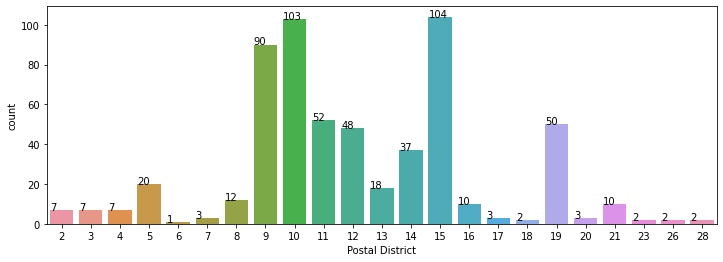

In [26]:
plt.figure(figsize=(12,4))
ax=sns.countplot(x='Postal District', data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
plt.show()

In [27]:
df[df['Postal District']==23]

,Contract Date,Postal District,Project Name,Completion,Number of Units,Tenure,Transacted Price,units
528,2018-08-20,23,PHOENIX HEIGHTS,1980,32,99 Yrs From 01/01/1969,33100000,"(0.383, 62.7]"
575,2019-07-25,23,PHOENIX HEIGHTS,1980,36,99 Yrs From 01/01/1969,42600000,"(0.383, 62.7]"


### Inference: Cashew Heights in District 23, where only 2 shop houses en bloc, chances is low

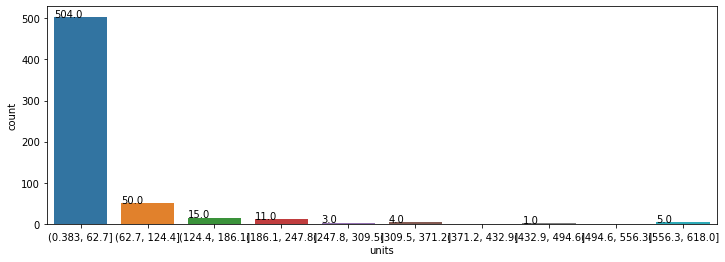

In [25]:
df['units'] = pd.cut(df['Number of Units'].astype(int), bins=10)
plt.figure(figsize=(12,4))
ax=sns.countplot(x='units', data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
plt.show()

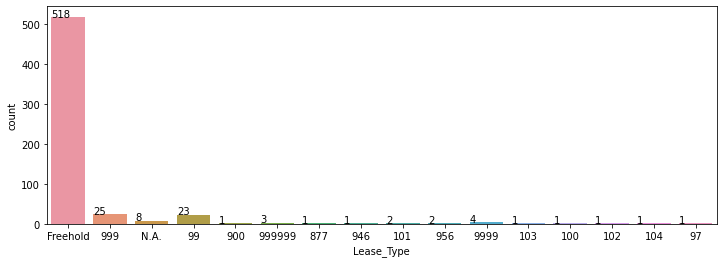

In [34]:
df['Lease_Type']=df['Tenure'].apply(lambda x: x.split(' ')[0])
df['Lease_Type']=np.where()
plt.figure(figsize=(12,4))
ax=sns.countplot(x='Lease_Type', data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
plt.show()

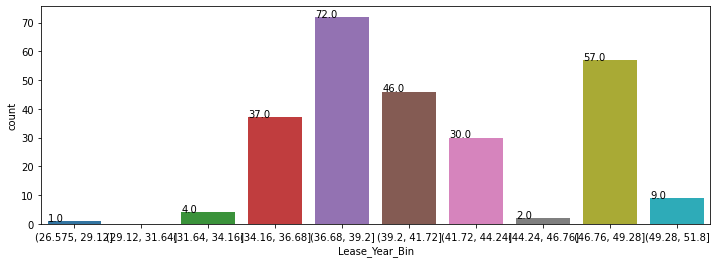

In [61]:
df['Lease_Year'] = round((pd.to_datetime(df['Contract Date'], errors='coerse') - pd.to_datetime(df['Completion'].replace('-',np.nan), errors='ignore'))/np.timedelta64(1, 'Y'),1)
df['Lease_Year_Bin'] = pd.cut(df['Lease_Year'],10)
plt.figure(figsize=(12,4))
ax=sns.countplot(x='Lease_Year_Bin', data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
plt.show()

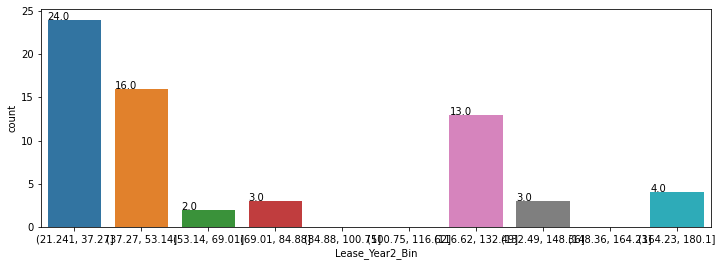

In [65]:
df['Lease_Year2'] = round((pd.to_datetime(df['Contract Date'], errors='coerse') - pd.to_datetime(df['Tenure'].apply(lambda x: x.split(' ')[-1]).replace({'Freehold':np.nan,'N.A.':np.nan,'Yrs':np.nan}), errors='ignore'))/np.timedelta64(1, 'Y'),1)
df['Lease_Year2_Bin'] = pd.cut(df['Lease_Year2'],10)
plt.figure(figsize=(12,4))
ax=sns.countplot(x='Lease_Year2_Bin', data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
plt.show()